####  Importing all required libraries for reading data, analysing and visualizing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the training & test data

In [2]:
#Adding Col into dataframe and reading csv file
colnames=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase',
          'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens',
          'Albumin','Albumin_and_Globulin_Ratio','Class'] 
Patients = pd.read_table('D:/all_downloads 4/IndianLiverPatientData.txt',
                        na_values = [None, 'NaN','Nothing'],names=colnames, header=None)
Patients.sample(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
196,60,Male,2.4,1.0,1124,30,54,5.2,1.9,0.50,No
146,65,Male,0.8,0.2,201,18,22,5.4,2.9,1.10,Yes
496,32,Male,0.7,0.2,165,31,29,6.1,3.0,0.96,Yes


In [3]:
Patients .replace(1,'one')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,one,0.4,182,14,20,6.8,3.4,one,No
5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,No
6,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,No
7,26,Female,0.9,0.2,154,16,12,7.0,3.5,one,No
8,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,No
9,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,Yes
10,55,Male,0.7,0.2,290,53,58,6.8,3.4,one,No


In [4]:
Patients.describe(include="all").T
Patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        563 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                568 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Class                         583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 54.7+ KB


## Univariant Analysis

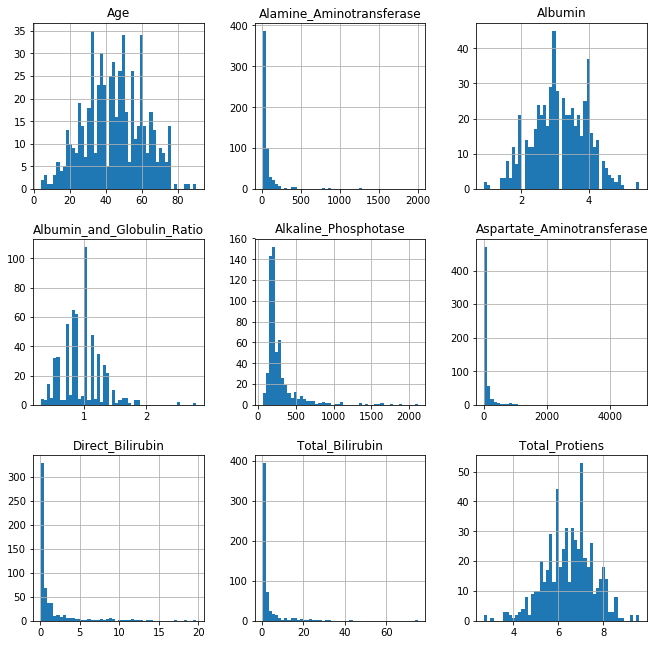

In [5]:
#Making Histograms of num col
num_columns = [col for col in Patients.columns.values if Patients[col].dtype != 'object']
num_features = Patients[num_columns]
num_features.hist(bins=50,figsize=(11,11));

In [6]:
#Patients.boxplot()
Patients['Direct_Bilirubin']=np.log(Patients['Direct_Bilirubin'])

Number of patients having liver disease:  167
Number of patients not having liver disease:  416


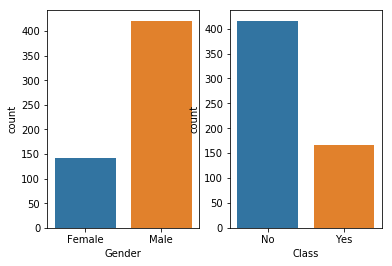

In [7]:
# Exploring Categorical Var
Cl_no,Cl_yes = Patients['Class'].value_counts()
print('Number of patients having liver disease: ',Cl_yes)
print('Number of patients not having liver disease: ',Cl_no)
fig, ax =plt.subplots(1,2)
sns.countplot(Patients['Class'], ax=ax[1])
sns.countplot(Patients['Gender'], ax=ax[0])
fig.show()


## Bivariant Analysis & Cleaning

In [8]:
#from sklearn import  preprocessing
#Patients =preprocessing.StandardScaler().fit(Patients).transform(Patients)

In [9]:
# Imputting Missing Values in numeric values
Patients.isna().sum()
Patients['Albumin_and_Globulin_Ratio'] = Patients['Albumin_and_Globulin_Ratio'].interpolate(method = 'linear')
Patients['Total_Protiens'] = Patients['Total_Protiens'].interpolate(method = 'linear')
# Imputting Missing Values in cat values
from sklearn_pandas import CategoricalImputer
imputer=CategoricalImputer(strategy='most_frequent')
imputer.fit(Patients.Gender)
Patients.Gender = imputer.transform(Patients.Gender)
Patients.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

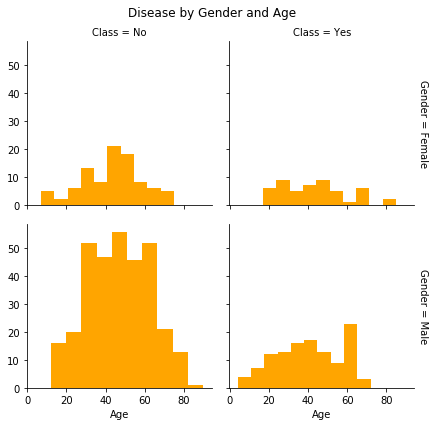

In [10]:
g = sns.FacetGrid(Patients, col="Class", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="orange")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [11]:
Patients['Gender'] = pd.get_dummies(Patients['Gender'])['Male']
Patients['Class'] = pd.get_dummies(Patients['Class'])['Yes']

## Correlation

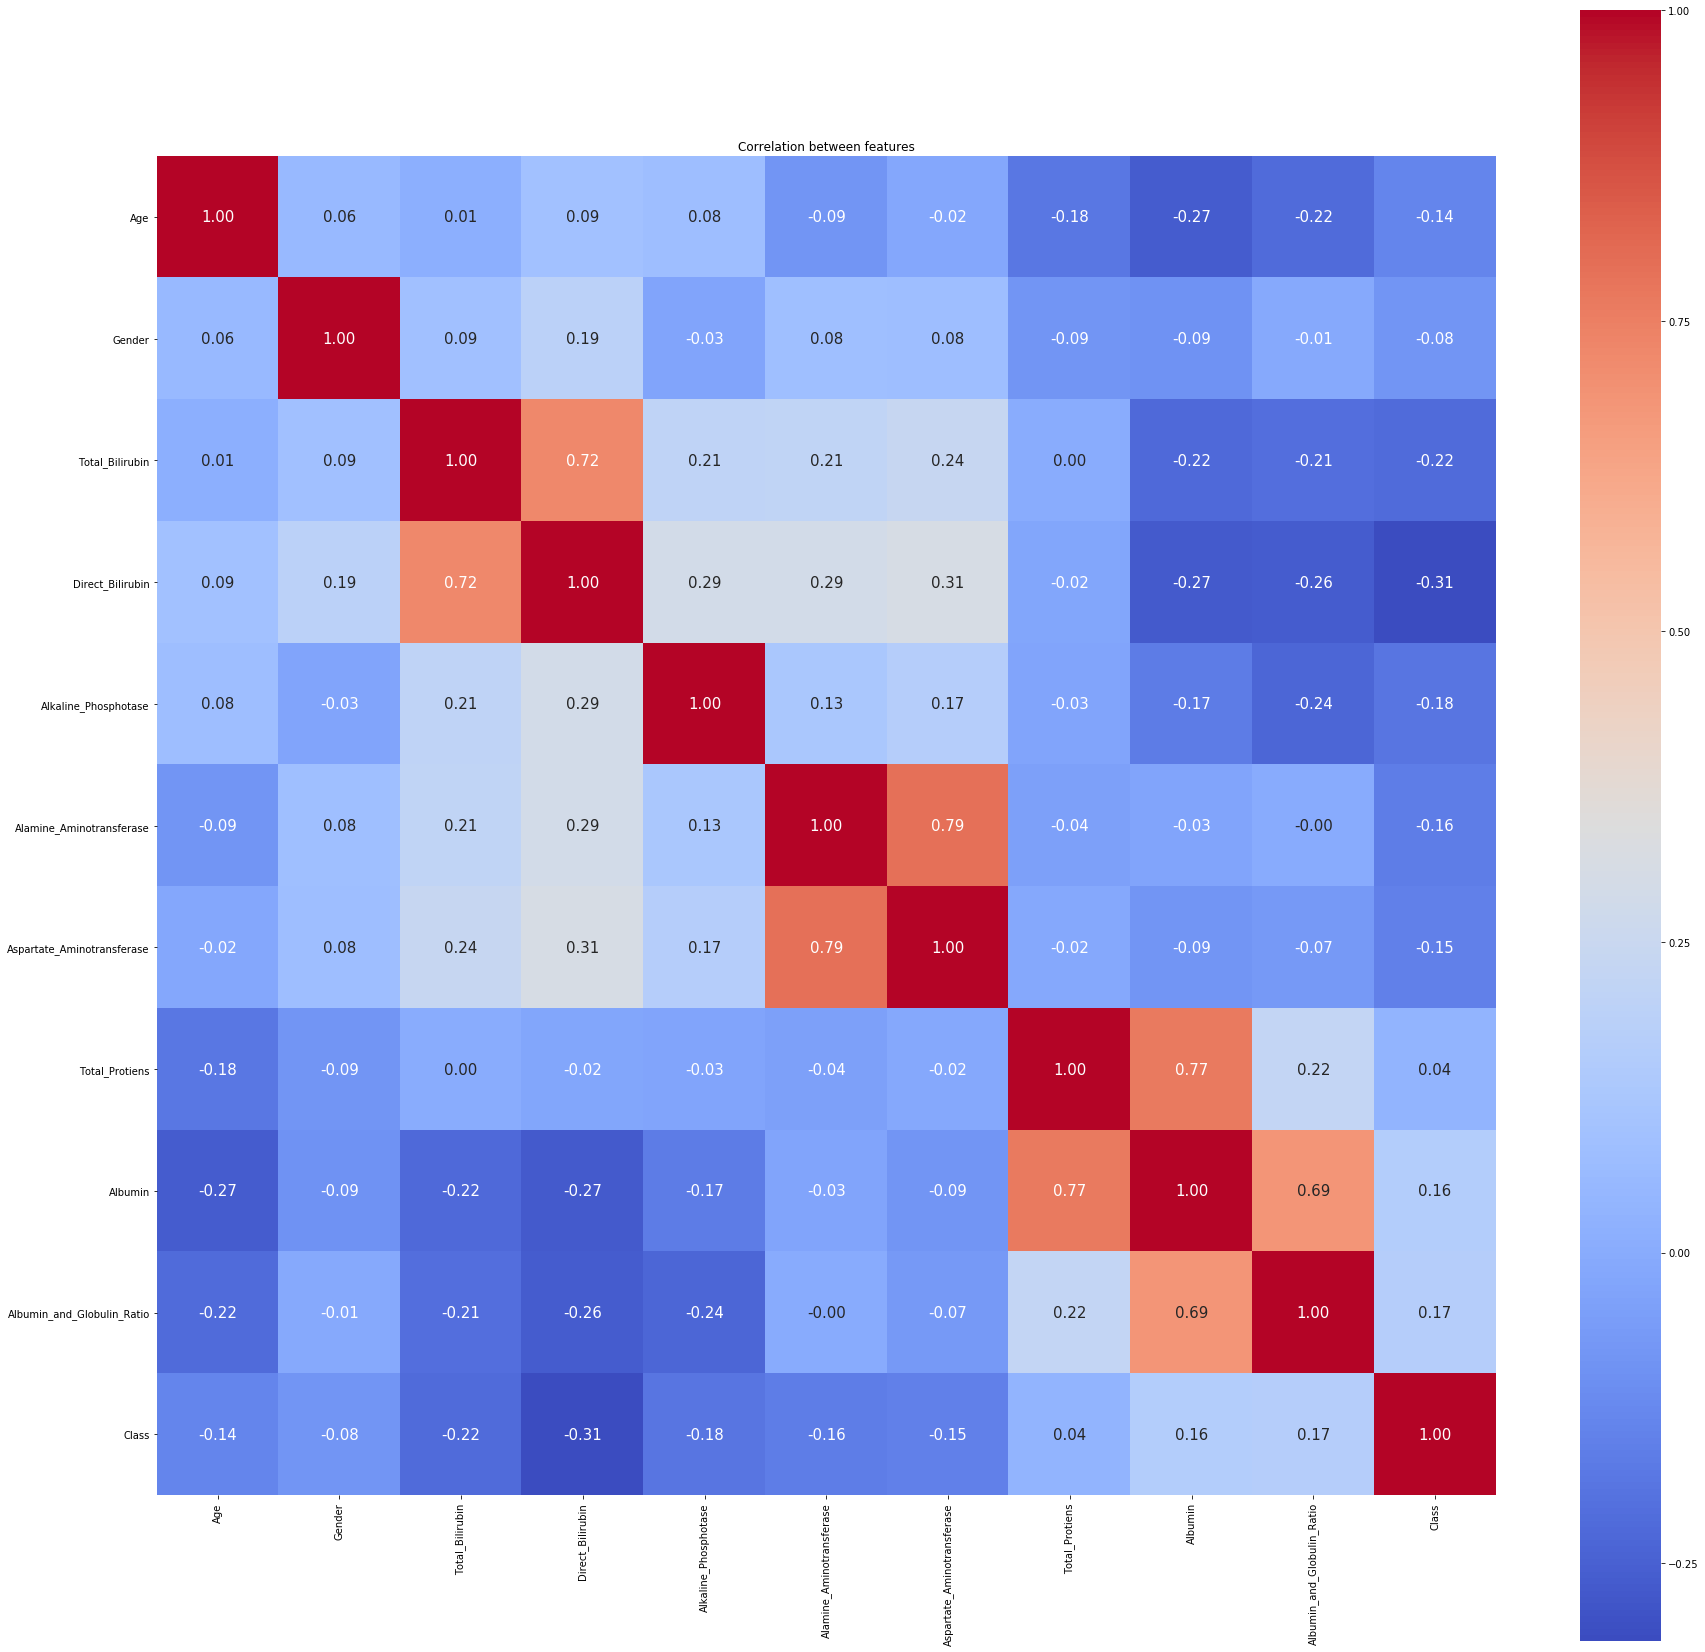

In [12]:
corr=Patients.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

### Split data into training and test sets

In [13]:
# The input variables/features are all the inputs except Dataset.
#The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
from sklearn.model_selection import train_test_split
X = Patients.drop('Class',axis=1)
y = Patients['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=143)

### Machine Learning

In [14]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

### Logistic Regression

In [15]:
# Create logistic regression object
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

Logistic Regression Train Score: 
 73.61
Logistic Regression Test Score: 
 71.79
Coefficient: 
 [[-0.01829921 -0.00149156 -0.11473412 -0.23041689 -0.00088316 -0.01088652
  -0.00125215 -0.26169092  0.49020244 -0.07091214]]
Intercept: 
 [0.83699766]
Accuracy: 
 0.717948717948718
Confusion Matrix: 
 [[78  3]
 [30  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.96      0.83        81
           1       0.67      0.17      0.27        36

   micro avg       0.72      0.72      0.72       117
   macro avg       0.69      0.56      0.55       117
weighted avg       0.71      0.72      0.65       117



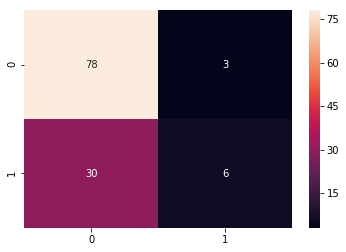

In [16]:
#Let see how our model performed
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Train Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

### Gaussian Naive Bayes

In [17]:
# Create logistic regression object
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

Gaussian Train Score: 
 53.22
Gaussian Test Score: 
 65.81
Accuracy: 
 0.6581196581196581
[[43 38]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68        81
           1       0.47      0.94      0.63        36

   micro avg       0.66      0.66      0.66       117
   macro avg       0.71      0.74      0.66       117
weighted avg       0.81      0.66      0.67       117



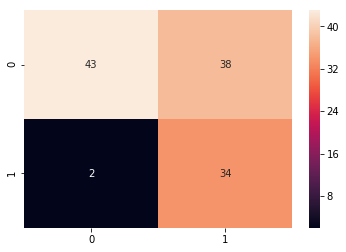

In [18]:
#Let see how our model performed
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Gaussian Train Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

### Svm

In [19]:
svm=SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

SVM Train Score: 
 99.57
SVM Test Score: 
 70.09
Accuracy: 
 0.7008547008547008
[[81  0]
 [35  1]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        81
           1       1.00      0.03      0.05        36

   micro avg       0.70      0.70      0.70       117
   macro avg       0.85      0.51      0.44       117
weighted avg       0.79      0.70      0.59       117



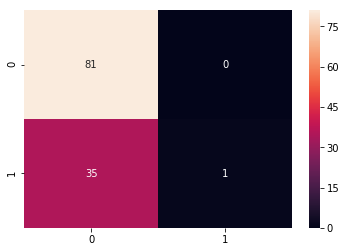

In [20]:
#Let see how our model performed
svm_score = round(svm.score(X_train, y_train) * 100, 2)
svm_score_test = round(svm.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('SVM Train Score: \n', svm_score)
print('SVM Test Score: \n', svm_score_test)
print('Accuracy: \n', accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")

### Decision Tree

In [21]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt.fit(X_train,y_train)
#Predict Output
dt_pred =  dt.predict(X_test)

Decision Tree Train Score: 
 80.04
Decision Tree Test Score: 
 67.52
Accuracy: 
 0.6752136752136753
[[75  6]
 [32  4]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        81
           1       0.40      0.11      0.17        36

   micro avg       0.68      0.68      0.68       117
   macro avg       0.55      0.52      0.49       117
weighted avg       0.61      0.68      0.61       117



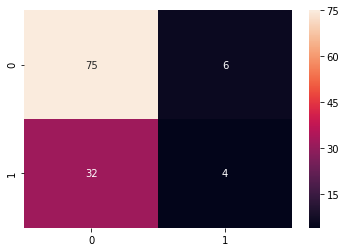

In [22]:
#Let see how our model performed
dt_score = round(dt.score(X_train, y_train) * 100, 2)
dt_score_test = round(dt.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Decision Tree Train Score: \n', dt_score)
print('Decision Tree Test Score: \n', dt_score_test)
print('Accuracy: \n', accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")

### XGBoost

In [23]:
params ={'objective':'binary:logistic','max_depth':2,'learning_rate':0.3,'silent':1,'colsample_bytree':0.6,'subsample':0.7,'n_estimators':5}
xgb=XGBClassifier(**params).fit(X_train,y_train)
#Predict Output
xgb_preds = xgb.predict(X_test)

XGBoost Train Score: 
 74.89
XGBoost Test Score: 
 70.94
Accuracy: 
 0.7094017094017094
[[76  5]
 [29  7]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        81
           1       0.58      0.19      0.29        36

   micro avg       0.71      0.71      0.71       117
   macro avg       0.65      0.57      0.55       117
weighted avg       0.68      0.71      0.66       117



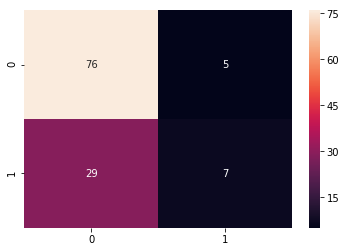

In [24]:
#Let see how our model performed
xgb_score = round(xgb.score(X_train, y_train) * 100, 2)
xgb_score_test = round(xgb.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('XGBoost Train Score: \n', xgb_score)
print('XGBoost Test Score: \n', xgb_score_test)
print('Accuracy: \n', accuracy_score(y_test,xgb_preds))
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))
sns.heatmap(confusion_matrix(y_test,xgb_preds),annot=True,fmt="d")

### Random Forest

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

Random Forest Train Score: 
 100.0
Random Forest Test Score: 
 73.5
Accuracy: 
 0.7350427350427351
[[74  7]
 [24 12]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        81
           1       0.63      0.33      0.44        36

   micro avg       0.74      0.74      0.74       117
   macro avg       0.69      0.62      0.63       117
weighted avg       0.72      0.74      0.71       117



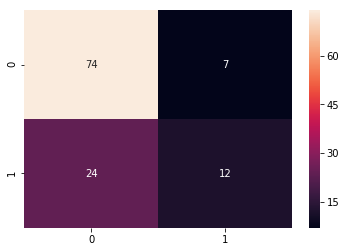

In [26]:
#Let see how our model performed
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Random Forest Train Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

### MLPClassifier

In [27]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
#Predict Output
pred_mlpc=mlpc.predict(X_test)

MLPClassifier Train Score: 
 71.03
MLPClassifier Test Score: 
 69.23
Accuracy: 
 0.6923076923076923
[[80  1]
 [35  1]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82        81
           1       0.50      0.03      0.05        36

   micro avg       0.69      0.69      0.69       117
   macro avg       0.60      0.51      0.43       117
weighted avg       0.64      0.69      0.58       117



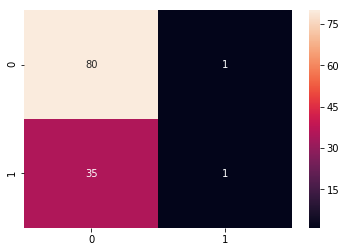

In [28]:
#Let see how our model performed
mlpc_score = round(mlpc.score(X_train, y_train) * 100, 2)
mlpc_score_test = round(mlpc.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('MLPClassifier Train Score: \n', mlpc_score)
print('MLPClassifier Test Score: \n', mlpc_score_test)
print('Accuracy: \n', accuracy_score(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
print(classification_report(y_test,pred_mlpc))
sns.heatmap(confusion_matrix(y_test,pred_mlpc),annot=True,fmt="d")

### Finding Multicollinearity

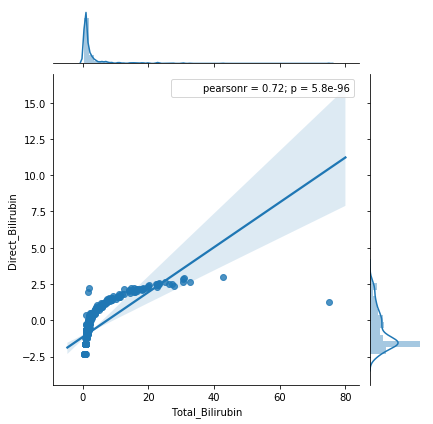

In [29]:
import scipy.stats as stats
j=sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=Patients, kind="reg")
j.annotate(stats.pearsonr)

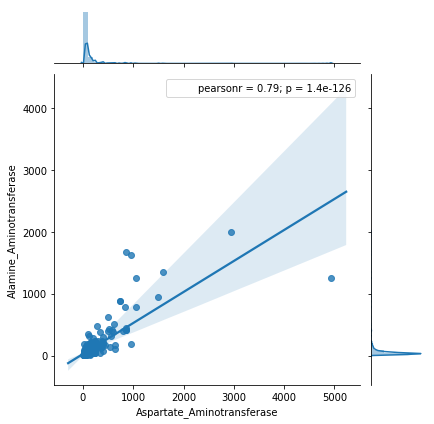

In [30]:
j2=sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=Patients, kind="reg")
j2.annotate(stats.pearsonr)

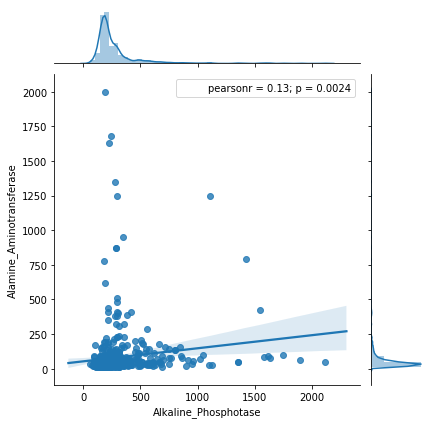

In [31]:
j3=sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=Patients, kind="reg")
j3.annotate(stats.pearsonr)

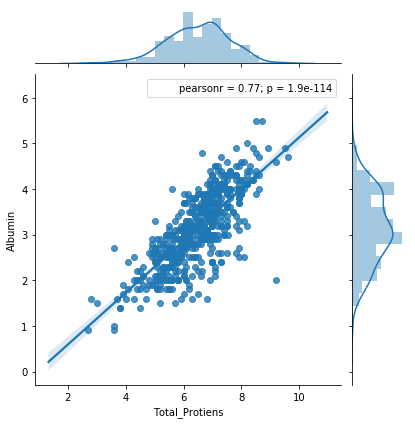

In [32]:
j4=sns.jointplot("Total_Protiens", "Albumin", data=Patients, kind="reg")
j4.annotate(stats.pearsonr)

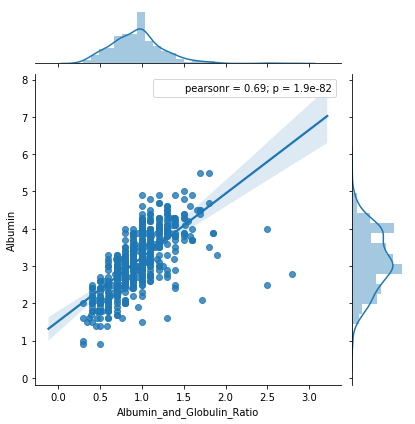

In [33]:
j5=sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=Patients, kind="reg")
j5.annotate(stats.pearsonr)

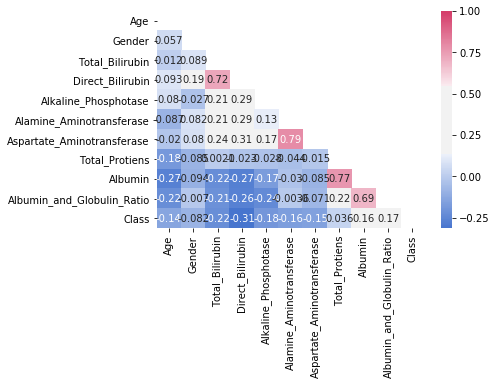

In [34]:
corr=Patients.select_dtypes(include=[np.number]).corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True), annot=True, mask=mask)

### Dropping High Multicollinearity col

In [35]:
Drop=['Direct_Bilirubin',
'Aspartate_Aminotransferase',
'Albumin']
New_Patients=Patients.drop(columns=Drop,axis=1)

In [36]:
#New_Patients.sample(3)
New_Patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 8 columns):
Age                           583 non-null int64
Gender                        583 non-null uint8
Total_Bilirubin               583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Total_Protiens                583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Class                         583 non-null uint8
dtypes: float64(3), int64(3), uint8(2)
memory usage: 53.0 KB


In [37]:
# . Split data into training and test sets
from sklearn.model_selection import train_test_split
X = New_Patients.drop('Class',axis=1)
y = New_Patients['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=143)

In [38]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

Logistic Regression Train Score: 
 73.18
Logistic Regression Test Score: 
 70.09
Coefficient: 
 [[-0.01962635 -0.05896968 -0.24321662 -0.0009278  -0.01224914 -0.02554096
   0.5400649 ]]
Intercept: 
 [0.83027454]
Accuracy: 
 0.7008547008547008
Confusion Matrix: 
 [[78  3]
 [32  4]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.96      0.82        81
           1       0.57      0.11      0.19        36

   micro avg       0.70      0.70      0.70       117
   macro avg       0.64      0.54      0.50       117
weighted avg       0.67      0.70      0.62       117



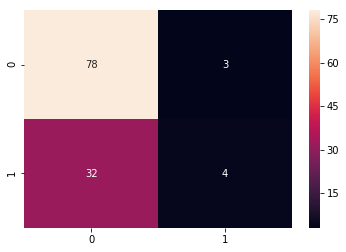

In [39]:
#Let see how our model performed
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Train Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [40]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

Gaussian Train Score: 
 53.22
Gaussian Test Score: 
 64.96
Accuracy: 
 0.6495726495726496
[[41 40]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.98      0.51      0.67        81
           1       0.47      0.97      0.63        36

   micro avg       0.65      0.65      0.65       117
   macro avg       0.72      0.74      0.65       117
weighted avg       0.82      0.65      0.66       117



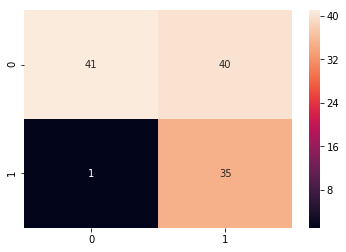

In [41]:
#Let see how our model performed
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Gaussian Train Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [42]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

Random Forest Train Score: 
 100.0
Random Forest Test Score: 
 70.09
Accuracy: 
 0.7008547008547008
[[73  8]
 [27  9]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        81
           1       0.53      0.25      0.34        36

   micro avg       0.70      0.70      0.70       117
   macro avg       0.63      0.58      0.57       117
weighted avg       0.67      0.70      0.66       117



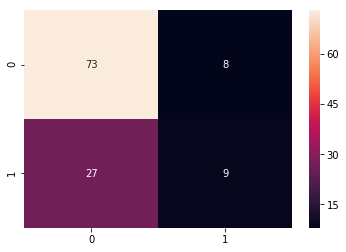

In [43]:
#Let see how our model performed
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Random Forest Train Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

## Upsamplling

In [44]:
from sklearn.utils import resample
# Separate majority and minority classes
major = Patients[Patients.Class==0]
minor = Patients[Patients.Class==1]
# Upsample minority class
minority_upsampled = resample(minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match majority class
                                 random_state=1) # reproducible results
# Combine majority class with upsampled minority class
Patients_upsampled = pd.concat([major, minority_upsampled])
 # Display new class counts
Patients_upsampled.Class.value_counts()

1    416
0    416
Name: Class, dtype: int64

In [45]:
# . Split data into training and test sets
from sklearn.model_selection import train_test_split
X = Patients_upsampled.drop('Class',axis=1)
y = Patients_upsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=143)

In [46]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

Logistic Regression Training Score: 
 70.83
Logistic Regression Test Score: 
 71.26
Coefficient: 
 [[-0.01769094 -0.12643493 -0.20194674 -0.11727378 -0.00187524 -0.01034179
  -0.00233462 -0.29160288  0.6632917   0.00550328]]
Intercept: 
 [1.85216932]
Accuracy: 
 0.7125748502994012
Confusion Matrix: 
 [[53 28]
 [20 66]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        81
           1       0.70      0.77      0.73        86

   micro avg       0.71      0.71      0.71       167
   macro avg       0.71      0.71      0.71       167
weighted avg       0.71      0.71      0.71       167



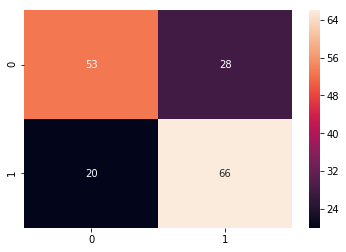

In [47]:
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [48]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

Gaussian Train Score: 
 68.42
Gaussian Test Score: 
 71.86
Accuracy: 
 0.718562874251497
[[40 41]
 [ 6 80]]
              precision    recall  f1-score   support

           0       0.87      0.49      0.63        81
           1       0.66      0.93      0.77        86

   micro avg       0.72      0.72      0.72       167
   macro avg       0.77      0.71      0.70       167
weighted avg       0.76      0.72      0.70       167



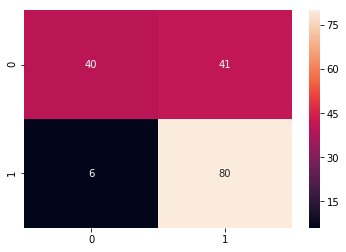

In [49]:
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Train Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [50]:
svm=SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

SVM Train Score: 
 100.0
SVM Test Score: 
 95.21
Accuracy: 
 0.9520958083832335
[[81  0]
 [ 8 78]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        81
           1       1.00      0.91      0.95        86

   micro avg       0.95      0.95      0.95       167
   macro avg       0.96      0.95      0.95       167
weighted avg       0.96      0.95      0.95       167



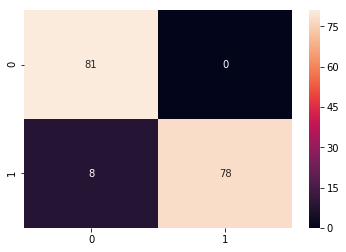

In [51]:
#Let see how our model performed
svm_score = round(svm.score(X_train, y_train) * 100, 2)
svm_score_test = round(svm.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('SVM Train Score: \n', svm_score)
print('SVM Test Score: \n', svm_score_test)
print('Accuracy: \n', accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")

In [52]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt.fit(X_train,y_train)
#Predict Output
dt_pred =  dt.predict(X_test)

Decision Tree Train Score: 
 76.54
Decision Tree Test Score: 
 76.65
Accuracy: 
 0.7664670658682635
[[43 38]
 [ 1 85]]
              precision    recall  f1-score   support

           0       0.98      0.53      0.69        81
           1       0.69      0.99      0.81        86

   micro avg       0.77      0.77      0.77       167
   macro avg       0.83      0.76      0.75       167
weighted avg       0.83      0.77      0.75       167



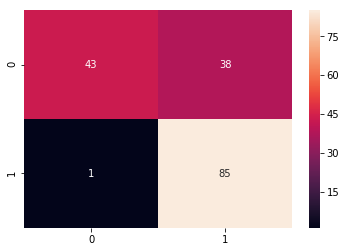

In [53]:
#Let see how our model performed
dt_score = round(dt.score(X_train, y_train) * 100, 2)
dt_score_test = round(dt.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Decision Tree Train Score: \n', dt_score)
print('Decision Tree Test Score: \n', dt_score_test)
print('Accuracy: \n', accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")

In [54]:
params ={'objective':'binary:logistic','max_depth':2,'learning_rate':0.3,'silent':1,'colsample_bytree':0.6,'subsample':0.7,'n_estimators':5}
xgb=XGBClassifier(**params).fit(X_train,y_train)
#Predict Output
xgb_preds = xgb.predict(X_test)

XGBoost Train Score: 
 71.73
XGBoost Test Score: 
 71.86
Accuracy: 
 0.718562874251497
[[50 31]
 [16 70]]
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        81
           1       0.69      0.81      0.75        86

   micro avg       0.72      0.72      0.72       167
   macro avg       0.73      0.72      0.71       167
weighted avg       0.72      0.72      0.72       167



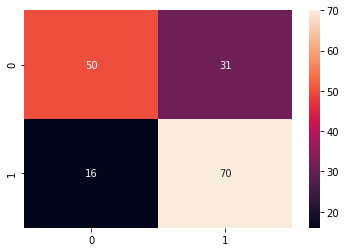

In [55]:
#Let see how our model performed
xgb_score = round(xgb.score(X_train, y_train) * 100, 2)
xgb_score_test = round(xgb.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('XGBoost Train Score: \n', xgb_score)
print('XGBoost Test Score: \n', xgb_score_test)
print('Accuracy: \n', accuracy_score(y_test,xgb_preds))
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))
sns.heatmap(confusion_matrix(y_test,xgb_preds),annot=True,fmt="d")

In [56]:
# Random Forest
random_forest = RandomForestClassifier()
a=random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
a.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 99.4
Random Forest Test Score: 
 90.42
Accuracy: 
 0.9041916167664671
[[70 11]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        81
           1       0.88      0.94      0.91        86

   micro avg       0.90      0.90      0.90       167
   macro avg       0.91      0.90      0.90       167
weighted avg       0.91      0.90      0.90       167



In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

MLPClassifier Train Score: 
 75.04
MLPClassifier Test Score: 
 74.85
Accuracy: 
 0.7485029940119761
[[45 36]
 [ 6 80]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        81
           1       0.69      0.93      0.79        86

   micro avg       0.75      0.75      0.75       167
   macro avg       0.79      0.74      0.74       167
weighted avg       0.78      0.75      0.74       167



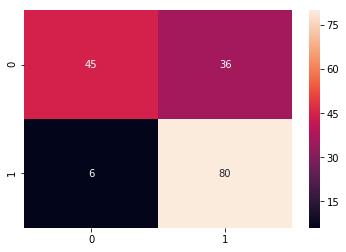

In [59]:
#Let see how our model performed
mlpc_score = round(mlpc.score(X_train, y_train) * 100, 2)
mlpc_score_test = round(mlpc.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('MLPClassifier Train Score: \n', mlpc_score)
print('MLPClassifier Test Score: \n', mlpc_score_test)
print('Accuracy: \n', accuracy_score(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
print(classification_report(y_test,pred_mlpc))
sns.heatmap(confusion_matrix(y_test,pred_mlpc),annot=True,fmt="d")

In [60]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM','DecisionTree','Xgboost','MLPClassifier'],
    'Score': [ logreg_score, gauss_score, random_forest_score,svm_score,dt_score,xgb_score,mlpc_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test,svm_score_test,dt_score_test,xgb_score_test,mlpc_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
3,SVM,100.00,95.21
2,Random Forest,99.40,90.42
4,DecisionTree,76.54,76.65
6,MLPClassifier,75.04,74.85
1,Gaussian Naive Bayes,68.42,71.86
5,Xgboost,71.73,71.86
0,Logistic Regression,70.83,71.26


In [61]:
#So we can Conclude that as per the rseults SVM is best for such kind of problems